In [ ]:
import numpy as np
from tensorflow import keras
from keras.layers import Dense, Activation, Dropout,Input, SimpleRNN
from keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical, plot_model
from keras.datasets import mnist

In [ ]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()
num_labels=len(np.unique(y_train))
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
shape1=x_train.shape[1]
shape2=x_train.shape[2]
x_train=x_train.reshape(-1,shape1,shape2).astype('float32') #4D tensor로 변경해줌
x_test=x_test.reshape(-1,shape1, shape2).astype('float32')   #4D tensor로 변경해줌
x_train=x_train/255.
x_test=x_test/255.
input_shape1=(shape1, shape2)  #RNN의 표본 하나당 입력은 2D tensor

In [ ]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]
print("partial_x_train",partial_x_train.shape)
print("partial_y_train",partial_y_train.shape)

partial_x_train (50000, 28, 28)
partial_y_train (50000, 10)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 256)               72960     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


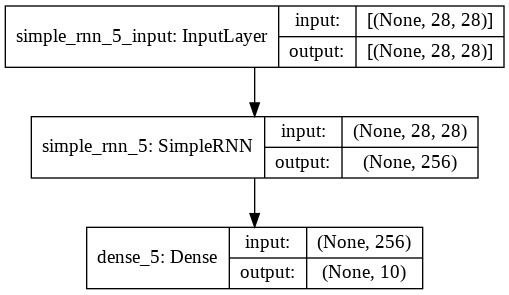

In [ ]:
model=Sequential()
model.add(SimpleRNN(units=256, dropout=0.2, input_shape=input_shape1))
model.add(Dense(10, activation='softmax'))
model.summary()
plot_model(model, to_file='D:\BDSC402\MLPmodel.png',show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=100, batch_size=64,validation_data=(x_val,y_val))
score=model.evaluate(x_test, y_test)  #test data의 결과 출력
print(score)

Epoch 1/100
938/938 [==============================] - 42s 44ms/step - loss: 0.4259 - accuracy: 0.8677 - val_loss: 0.3672 - val_accuracy: 0.8907
Epoch 2/100
938/938 [==============================] - 41s 44ms/step - loss: 0.2263 - accuracy: 0.9328 - val_loss: 0.1926 - val_accuracy: 0.9466
Epoch 3/100
938/938 [==============================] - 41s 44ms/step - loss: 0.1887 - accuracy: 0.9449 - val_loss: 0.1396 - val_accuracy: 0.9635
Epoch 4/100
938/938 [==============================] - 41s 43ms/step - loss: 0.1689 - accuracy: 0.9515 - val_loss: 0.1381 - val_accuracy: 0.9603
Epoch 5/100
938/938 [==============================] - 41s 43ms/step - loss: 0.1564 - accuracy: 0.9547 - val_loss: 0.1478 - val_accuracy: 0.9590
Epoch 6/100
938/938 [==============================] - 40s 43ms/step - loss: 0.1482 - accuracy: 0.9564 - val_loss: 0.0971 - val_accuracy: 0.9710
Epoch 7/100
938/938 [==============================] - 40s 43ms/step - loss: 0.1416 - accuracy: 0.9591 - val_loss: 0.0999 - val_ac

In [ ]:
history_out=history.history
history_out.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

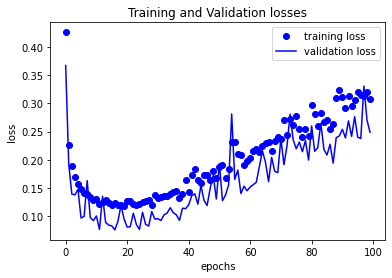

In [ ]:
import matplotlib.pyplot as plt

loss=history_out['loss']
loss_val=history_out['val_loss']
accuracy=history_out['accuracy']
accuracy_val=history_out['val_accuracy']

plt.plot(loss, 'bo', label='training loss')
plt.plot(loss_val,'b', label='validation loss')

plt.title('Training and Validation losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

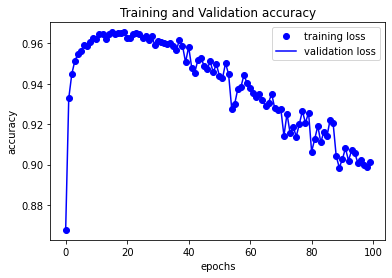

In [ ]:
plt.clf()
plt.plot(accuracy, 'bo', label='training loss')
plt.plot(accuracy,'b', label='validation loss')

plt.title('Training and Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()